<a href="https://colab.research.google.com/github/Mostaq27/Data_processing_And_Plotting/blob/main/Data_season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Imports + read CSV

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The uploaded file name (change if different)
df = pd.read_csv('data_season.csv')

print(f"Loaded {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

Loaded 3,158 rows × 12 columns


,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif


In [4]:
# 2. Clean & process data

# Convert Year to integer (if not already)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Handle missing or empty values (e.g., Soil type has ,, which becomes NaN)
df.replace('', np.nan, inplace=True)  # Replace empty strings with NaN
df['Soil type'].fillna('Unknown', inplace=True)  # Fill missing soil types

# Ensure numeric columns are properly typed
numeric_cols = ['Area', 'Rainfall', 'Temperature', 'yeilds', 'Humidity', 'price']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with critical NaNs (e.g., if Year or yields is missing)
df.dropna(subset=['Year', 'yeilds'], inplace=True)

# Add a derived column: Yield per Area (if Area > 0)
df['Yield_per_Area'] = df['yeilds'] / df['Area'].where(df['Area'] > 0, np.nan)

print("Unique locations:", df['Location'].unique())
print("Unique crops:", df['Crops'].unique())
print("Unique seasons:", df['Season'].unique())
print("Date range (Years):", df['Year'].min(), "→", df['Year'].max())
df.head()

Unique locations: ['Mangalore' 'Kodagu' 'Kasaragodu' 'Raichur' 'Gulbarga' 'Madikeri'
 'Hassan' 'Mysuru' 'Chikmangaluru' 'Bangalore' 'Davangere']
Unique crops: ['Coconut' 'Cocoa' 'Coffee' 'Cardamum' 'Pepper' 'Arecanut' 'Ginger' 'Tea'
 'Paddy' 'Groundnut' 'Blackgram' 'Cashew' 'Cotton']
Unique seasons: ['Kharif' 'Rabi' 'Zaid']
Date range (Years): 2004 → 2019


/tmp/ipython-input-4051698128.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Soil type'].fillna('Unknown', inplace=True)  # Fill missing soil types


,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season,Yield_per_Area
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif,2.009382
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif,2.045472
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif,2.201577
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif,1.933793
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif,1.820411


In [5]:
# 3. Summary stats

df.describe().round(2)

,Year,Area,Rainfall,Temperature,yeilds,Humidity,price,Yield_per_Area
count,3158.00,3158.00,3158.00,3158.00,3158.00,3158.00,3158.00,3158.00
mean,2009.93,9329.91,2813.13,65.89,23258.98,55.58,86271.28,608.22
std,5.10,15180.47,1163.83,60.81,58228.99,2.47,94123.16,5685.05
min,2004.00,1.00,233.00,26.80,2.00,50.00,637.00,0.00
25%,2004.00,153.00,2903.10,27.00,393.00,54.00,2644.00,0.13
50%,2010.00,2127.00,3296.00,38.00,2783.00,56.00,45186.00,1.67
75%,2015.00,10910.00,3550.00,43.00,6589.00,57.00,203317.00,19.93
max,2019.00,52119.00,3729.80,222.00,623687.00,60.00,249978.00,171739.00


In [7]:
# 4. Aggregates: Yearly averages by Crop

# Group by Year and Crop: mean yield, mean rainfall, etc.
yearly_crop = df.groupby(['Year', 'Crops']).agg(
    Avg_Yield=('yeilds', 'mean'),
    Total_Area=('Area', 'sum'),
    Avg_Rainfall=('Rainfall', 'mean'),
    Avg_Temp=('Temperature', 'mean'),
    Avg_Humidity=('Humidity', 'mean'),
    Avg_Price=('price', 'mean')
).reset_index()

# Also, by Season
season_agg = df.groupby('Season').agg(
    Avg_Yield=('yeilds', 'mean'),
    Avg_Rainfall=('Rainfall', 'mean')
).reset_index()

yearly_crop.head()

,Year,Crops,Avg_Yield,Total_Area,Avg_Rainfall,Avg_Temp,Avg_Humidity,Avg_Price
0,2004,Arecanut,9104.694444,117283,3184.994444,45.419444,55.388889,98380.305556
1,2004,Blackgram,17885.842105,317532,2377.518421,46.536842,55.834211,73433.921053
2,2004,Cardamum,3151.789474,592377,2731.202632,30.928947,55.421053,79965.631579
3,2004,Cashew,2699.029412,215272,3071.000000,42.347059,55.308824,87972.588235
4,2004,Cocoa,1856.562500,166943,2870.050000,71.437500,54.875000,131512.000000


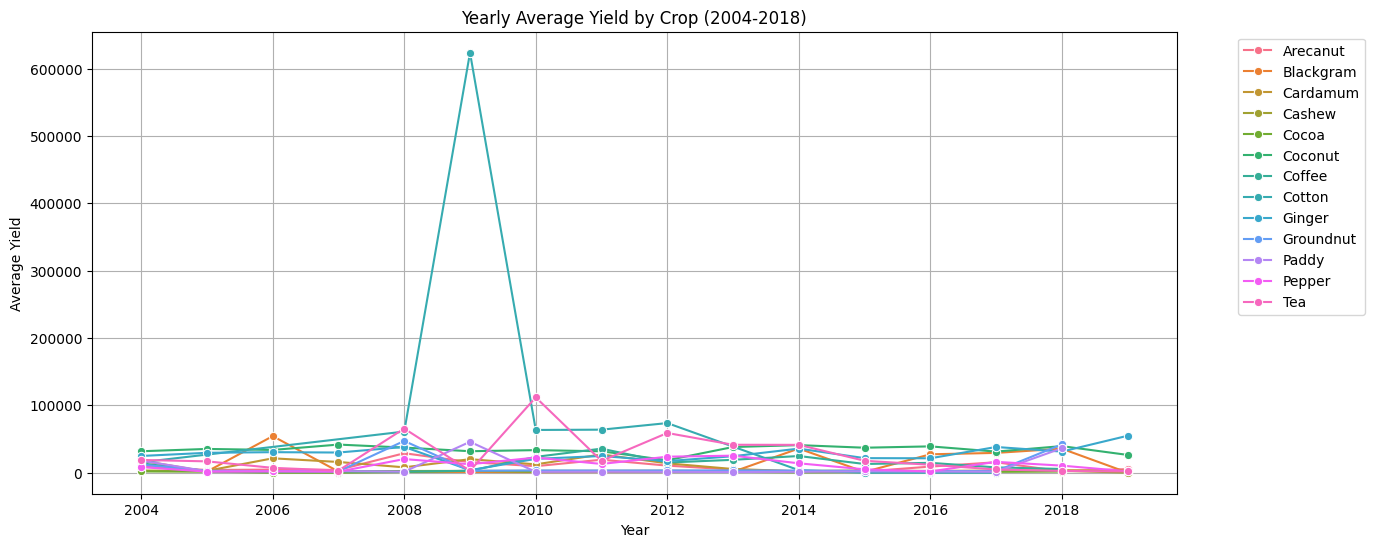

In [8]:
# 5. Plot - Yearly Average Yield by Crop (Line plot)

plt.figure(figsize=(14,6))
sns.lineplot(data=yearly_crop, x='Year', y='Avg_Yield', hue='Crops', marker='o')
plt.title('Yearly Average Yield by Crop (2004-2018)')
plt.ylabel('Average Yield')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

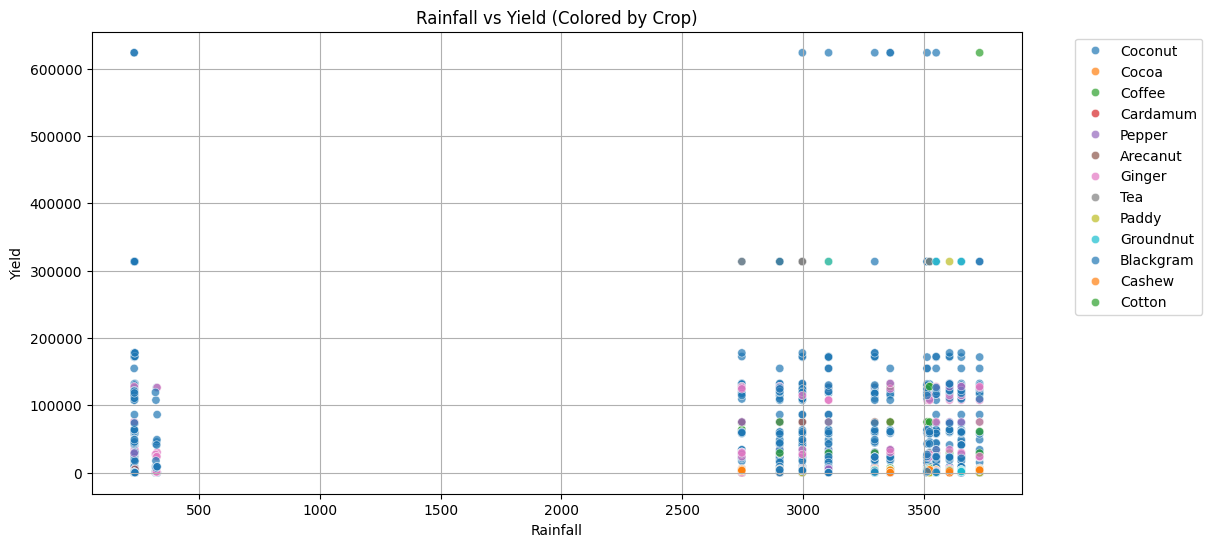

In [10]:
# 6. Plot - Rainfall vs Yield Scatter (colored by Crop)

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Rainfall', y='yeilds', hue='Crops', palette='tab10', alpha=0.7)
plt.title('Rainfall vs Yield (Colored by Crop)')
plt.xlabel('Rainfall')
plt.ylabel('Yield')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

/tmp/ipython-input-3221503774.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Season', y='Temperature', palette='coolwarm')


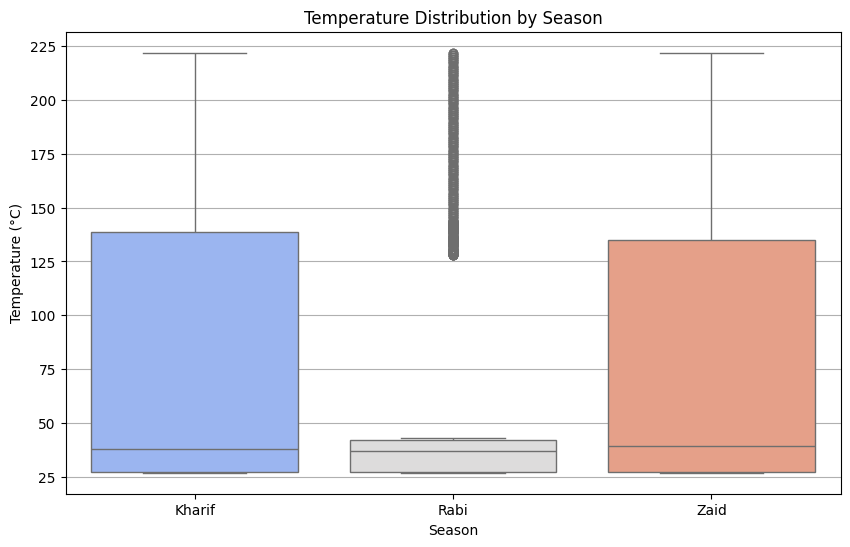

In [11]:
# 7. Plot - Temperature Distribution by Season (Boxplot)

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Season', y='Temperature', palette='coolwarm')
plt.title('Temperature Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.grid(axis='y')
plt.show()

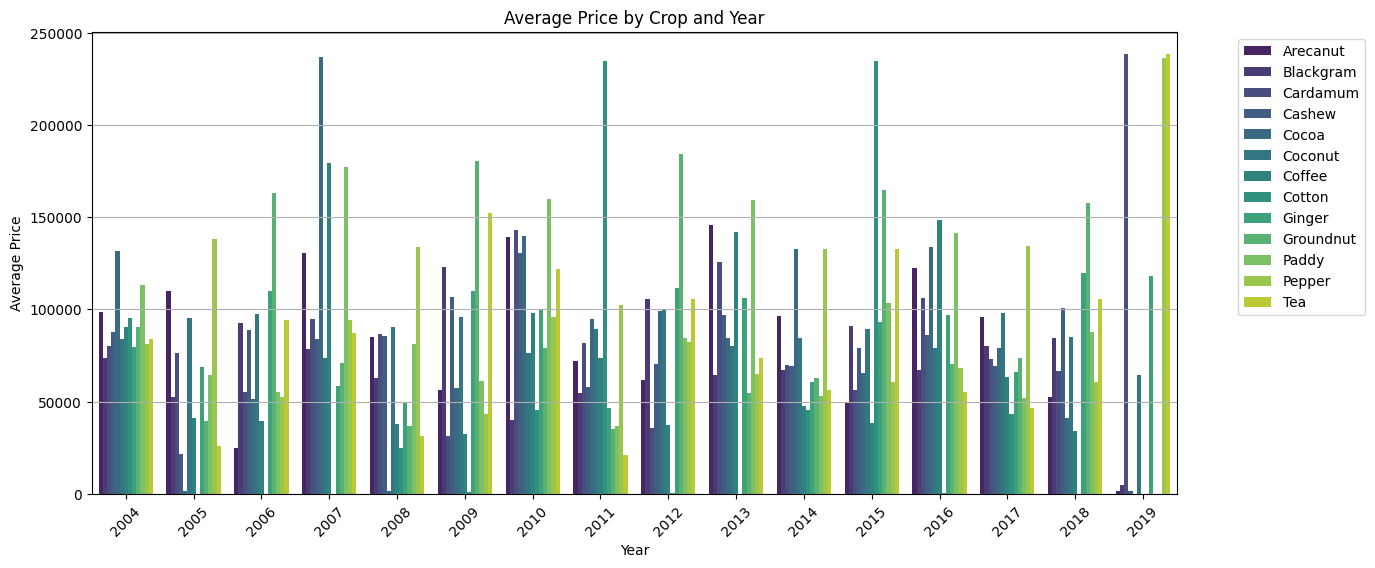

In [12]:
# 8. Plot - Average Price by Crop and Year (Bar plot)

plt.figure(figsize=(14,6))
sns.barplot(data=yearly_crop, x='Year', y='Avg_Price', hue='Crops', palette='viridis')
plt.title('Average Price by Crop and Year')
plt.ylabel('Average Price')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

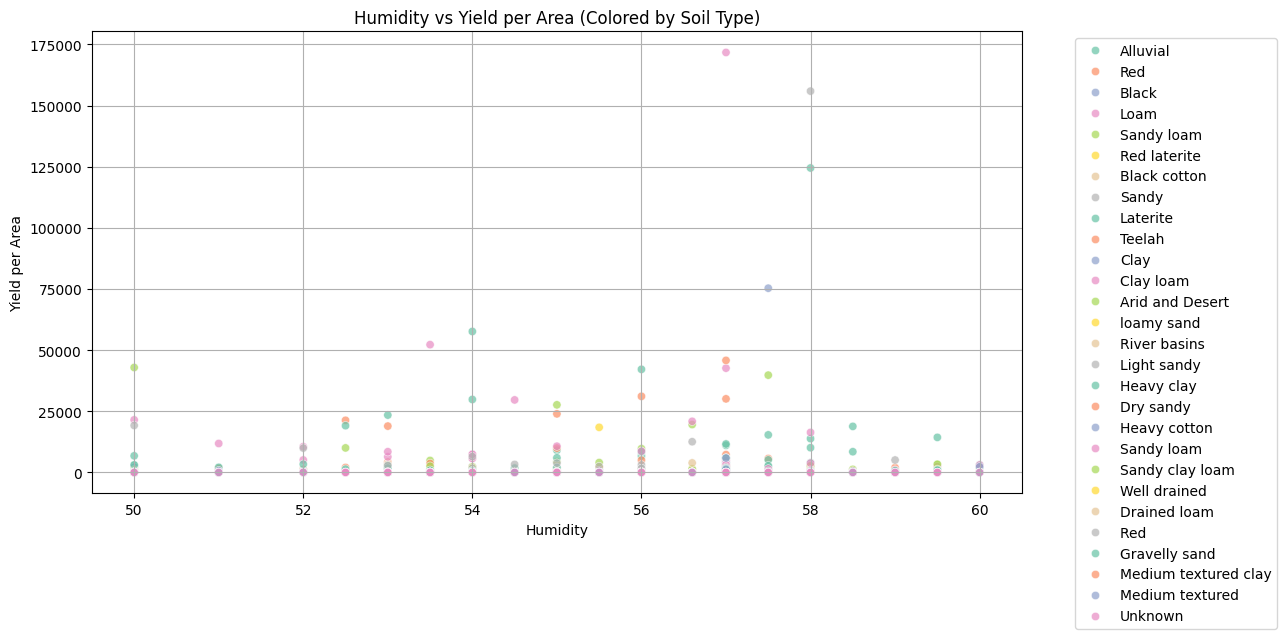

In [13]:
# 9. Plot - Humidity vs Yield per Area (Scatter, colored by Soil type)

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Humidity', y='Yield_per_Area', hue='Soil type', palette='Set2', alpha=0.7)
plt.title('Humidity vs Yield per Area (Colored by Soil Type)')
plt.xlabel('Humidity')
plt.ylabel('Yield per Area')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [15]:
# 10. (Optional) Save Processed Data
from google.colab import files

df.to_csv('data_season_cleaned.csv', index=False)
files.download('data_season_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>